In [1]:
from fastai2.vision.all import *
import torchvision.transforms as transforms
from numpy import asarray
import io
from PIL import Image


In [2]:
path = untar_data(URLs.IMAGENETTE)

In [3]:
(path/'train').ls()

(#10) [Path('/home/jayajasodani/.fastai/data/imagenette2/train/n02102040'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n03888257'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n03417042'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n02979186'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n03394916'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n03425413'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n03028079'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n03000684'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n03445777'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n01440764')]

In [4]:
(path/'train'/'n02102040').ls()

(#955) [Path('/home/jayajasodani/.fastai/data/imagenette2/train/n02102040/n02102040_2048.JPEG'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n02102040/n02102040_3258.JPEG'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n02102040/n02102040_626.JPEG'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n02102040/n02102040_2344.JPEG'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n02102040/n02102040_3295.JPEG'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n02102040/n02102040_1907.JPEG'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n02102040/n02102040_4956.JPEG'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n02102040/n02102040_3608.JPEG'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n02102040/n02102040_7124.JPEG'),Path('/home/jayajasodani/.fastai/data/imagenette2/train/n02102040/n02102040_7617.JPEG')...]

In [5]:
img_path = (path/'train'/'n02102040'/'n02102040_4956.JPEG')

In [150]:
im=Image.open(img_path)
data=asarray(im)  #convert image to numpy array
data.shape

(360, 351, 3)

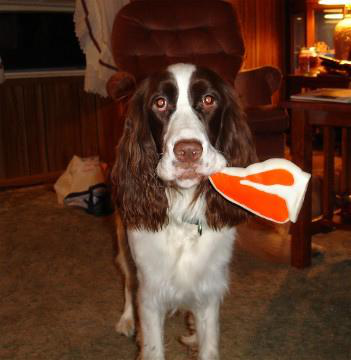

In [157]:
jimage = Image.fromarray(data.astype('uint8'), 'RGB') #convert numpy array to image 
jimage

In [6]:
files = get_image_files(path/'train'/'n02102040')

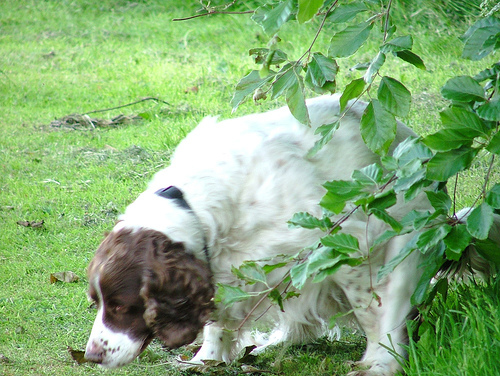

In [8]:
img= PILImage.create(files[1]) #direct way to create PIL image from PosixPath
img
#imdog=Image.open(img)
#imdog.shape

In [11]:


img = Image.open(img, mode='r') # convert image to byte size object
imgByteArr = io.BytesIO()
img.save(imgByteArr, format='JPEG')
imgByteArr = imgByteArr.getvalue()

#torch_image = torch.from_numpy(img).long()




AttributeError: 'PILImage' object has no attribute 'read'

In [9]:
def transform_image(image_bytes):     #pytorch function to transform image.
    my_transforms = transforms.Compose([transforms.Resize(255),
                                        transforms.CenterCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize(
                                            [0.485, 0.456, 0.406],
                                            [0.229, 0.224, 0.225])])
    image = Image.open(io.BytesIO(image_bytes))
    return my_transforms(image).unsqueeze(0)

In [13]:
def transformtt_image(image_bytes):  #pytorch function using FiveCrop that crops the image into 4 squares at corner and center crop
    my_transforms = transforms.FiveCrop(224)
    return my_transforms(image_bytes)

In [10]:
transform_image(img)


TypeError: a bytes-like object is required, not 'PILImage'

In [16]:
transformtt_image(img)

(<PIL.Image.Image image mode=RGB size=224x224 at 0x7F0E05DC9210>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F0E05DAFC10>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F0D8E5FD910>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F0D8E5FDE50>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x7F0D8E5FDF10>)

In [ ]:
model = xresnet18()
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy) learn.fit_one_cycle(5, 3e-3)

In [ ]:
preds,targs = learn.tta()
accuracy(preds, targs).item()